In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
from datasets import SinusoidDataset, RiemmannianSinusoidDataset
from models import MLPCNF
from lightning import Trainer
from lightning.pytorch.callbacks import RichModelSummary

In [ ]:
dataset = SinusoidDataset()
model = MLPCNF(
    dim=3,
    obs_dim=len(dataset.observation_times),
    hidden_dim=512,
    depth=8,
    lr=1e-4,
)
# model = torch.compile(model)

train_dataloader = dataset.dataloader(
    batch_size=1024,
    batches=1024,
    num_workers=8,
    persistent_workers=True,
    pin_memory=True,
)
trainer = Trainer(
    max_epochs=10,
    callbacks=[RichModelSummary()],
)
trainer.fit(model, train_dataloader)

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓
┃   ┃ Name ┃ Type ┃ Params ┃
┡━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩
│ 0 │ flow │ MLP  │  1.9 M │
└───┴──────┴──────┴────────┘

Trainable params: 1.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.9 M                                                                                                
Total estimated model params size (MB): 7

Epoch 9: 100%|██████████| 1024/1024 [00:06<00:00, 154.68it/s, v_num=57, flow_loss=0.474]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1024/1024 [00:06<00:00, 152.76it/s, v_num=57, flow_loss=0.474]


c:\Users\ricca\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Pushing data through flow


100%|██████████| 16/16 [00:00<00:00, 1624.28it/s]


Running MCMC sampling


100%|██████████| 300/300 [00:03<00:00, 97.73it/s] 


Finished initial run, burn-in dropped and starting real run


 20%|██        | 1/5 [00:08<00:35,  8.82s/it]

Pushing data through flow


100%|██████████| 16/16 [00:00<00:00, 2453.71it/s]


Running MCMC sampling


100%|██████████| 300/300 [00:02<00:00, 105.45it/s]


Finished initial run, burn-in dropped and starting real run


 40%|████      | 2/5 [00:18<00:27,  9.07s/it]

Pushing data through flow


100%|██████████| 16/16 [00:00<00:00, 1571.71it/s]


Running MCMC sampling


100%|██████████| 300/300 [00:02<00:00, 105.87it/s]


Finished initial run, burn-in dropped and starting real run


 60%|██████    | 3/5 [00:27<00:18,  9.07s/it]

Pushing data through flow


100%|██████████| 16/16 [00:00<00:00, 979.33it/s]


Running MCMC sampling


100%|██████████| 300/300 [00:03<00:00, 98.52it/s] 


Finished initial run, burn-in dropped and starting real run


 80%|████████  | 4/5 [00:36<00:09,  9.13s/it]

Pushing data through flow


100%|██████████| 16/16 [00:00<00:00, 1611.18it/s]


Running MCMC sampling


100%|██████████| 300/300 [00:03<00:00, 99.10it/s]


Finished initial run, burn-in dropped and starting real run


100%|██████████| 5/5 [00:45<00:00,  9.08s/it]


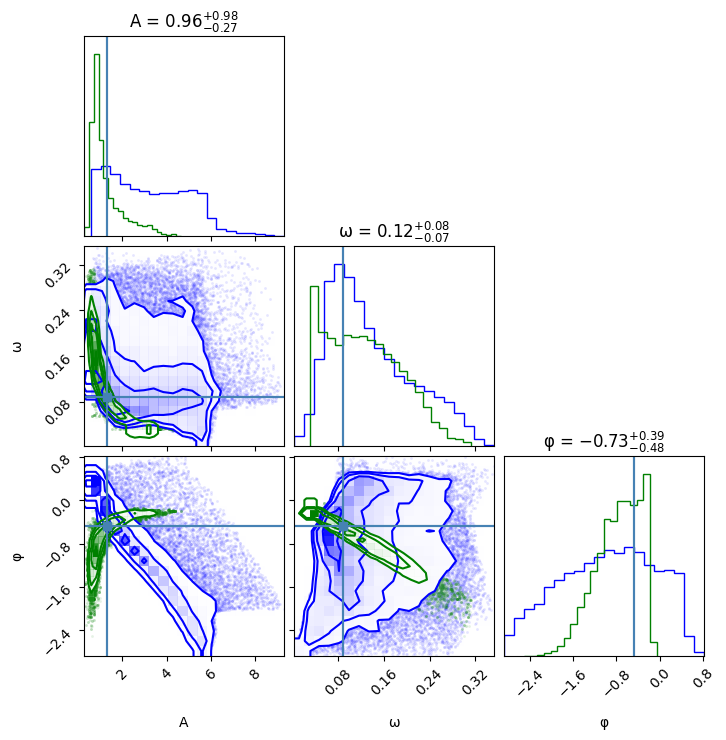

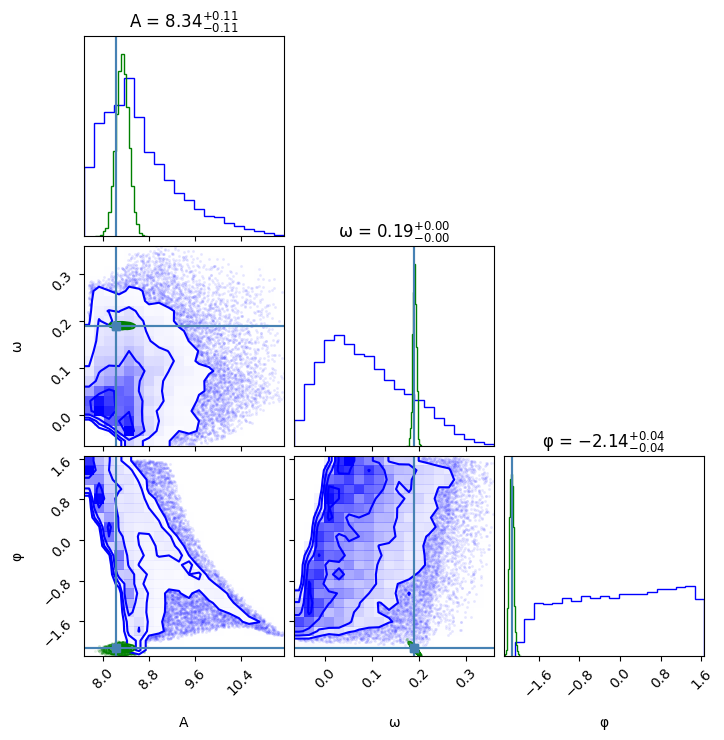

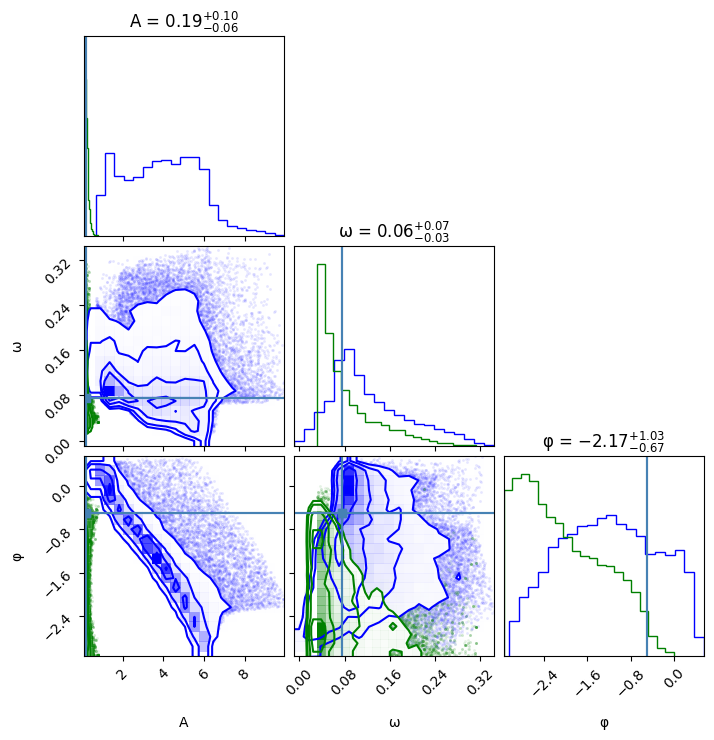

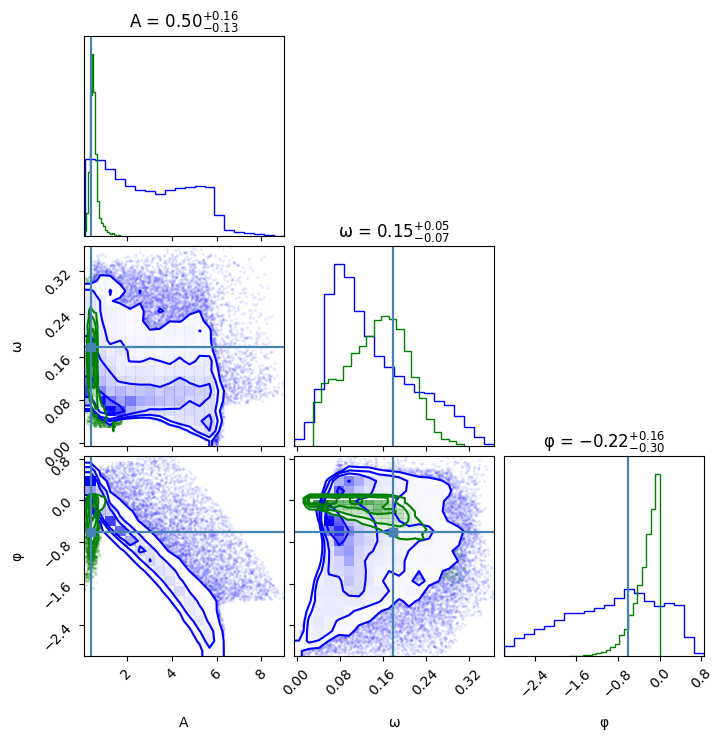

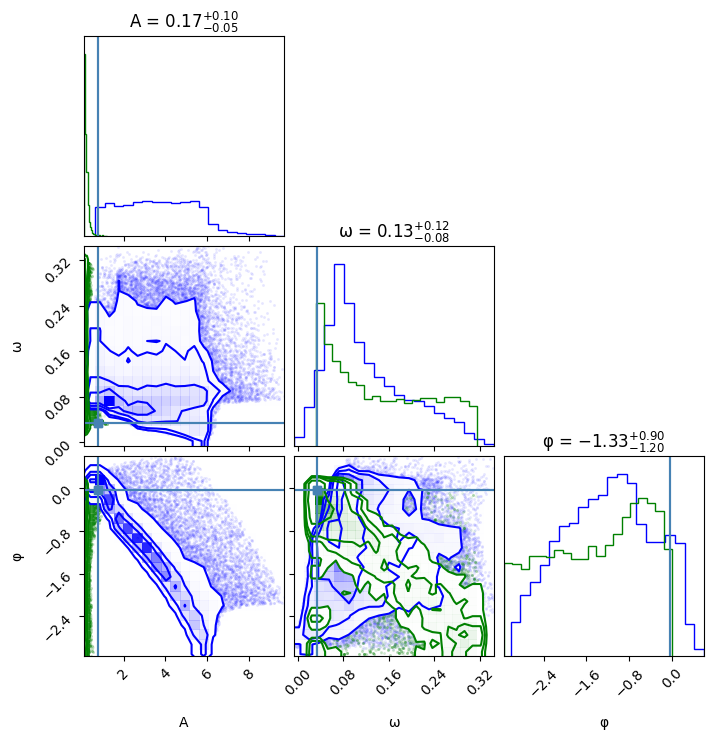

In [4]:
from utils import corner_plot
corner_plot(dataset, model.to("cuda"), examples=5, ode_steps=16, samples=32*1024, verbose=True)

In [5]:
import numpy as np

a = np.arange(10)
b = np.arange(10)
print((a/b).shape)

(10,)


C:\Users\ricca\AppData\Local\Temp\ipykernel_17480\2524625327.py:5: RuntimeWarning: invalid value encountered in divide
  print((a/b).shape)
